# Import Libraries

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plotly==5.19.0s (from versions: 0.2, 0.3, 0.4, 0.5, 0.5.1, 0.5.2, 0.5.3, 0.5.4, 0.5.5, 0.5.6, 0.5.7, 0.5.8, 0.5.9, 0.5.10, 0.5.11, 0.5.12, 0.5.13, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.0.9, 1.0.10, 1.0.11, 1.0.12, 1.0.13, 1.0.14, 1.0.15, 1.0.16, 1.0.17, 1.0.18, 1.0.19, 1.0.20, 1.0.21, 1.0.22, 1.0.23, 1.0.24, 1.0.25, 1.0.26, 1.0.27, 1.0.28, 1.0.29, 1.0.30, 1.0.31, 1.0.32, 1.0.33, 1.0.34, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.6, 1.2.7, 1.2.8, 1.2.9, 1.3.0, 1.3.1, 1.3.2, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 1.4.4, 1.4.5, 1.4.7, 1.4.9, 1.4.10, 1.4.11, 1.4.12, 1.4.13, 1.4.14, 1.5.0, 1.6.4, 1.6.6, 1.6.7, 1.6.8, 1.6.9, 1.6.10, 1.6.11, 1.6.12, 1.6.13, 1.6.14, 1.6.15, 1.6.16, 1.6.17, 1.6.19, 1.7.0, 1.7.1, 1.7.2, 1.7.3, 1.7.4, 1.7.5, 1.7.6, 1.7.7, 1.7.9, 1.8.0, 1.8.1, 1.8.2, 1.8.3, 1.8.4, 1.8.5, 1.8.6, 1.8.8, 1.8.11, 1.8.12, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.9.4, 1.9.5, 1.9.6, 1.9.7, 

In [2]:
from data_preprocessing.data_extractor import DataExtractor
from data_preprocessing.data_transformation import DataTransformer
import logging
import requests
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create logger
logger = logging.getLogger()

# Create handler that outputs to notebook
handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(message)s')
handler.setFormatter(formatter)

# Add handler to root logger
logger.addHandler(handler)

# Data Extraction

In [3]:
extractor = DataExtractor()
orders_df = extractor.fetch_parquet_data(parquet_file="data/orders.parquet")

2025-05-30 06:55:54,323 - Fetching Parquet data from data/orders.parquet
2025-05-30 06:55:54,323 - Fetching Parquet data from data/orders.parquet


# Sample Data & Data Exploration

In [4]:
# View total rows and columns
num_rows, num_columns = orders_df.shape

# Print the total number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 3927651
Number of columns: 4


In [5]:
# View sample data
orders_df.head(5)

,id,created_at,sales_amount,customer_id
0,29503467,2024-12-30 19:24:05,3.45,2937655
1,29511871,2024-12-30 22:09:52,3.45,1865364
2,29517274,2024-12-31 08:30:45,3.45,896267
3,29561364,2024-12-31 16:35:49,3.45,4077636
4,29562591,2024-12-31 16:50:58,3.45,124644


In [6]:
# View data types
orders_df.dtypes

id                      object
created_at      datetime64[ns]
sales_amount           float64
customer_id             object
dtype: object

In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927651 entries, 0 to 3927650
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            object        
 1   created_at    datetime64[ns]
 2   sales_amount  float64       
 3   customer_id   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 119.9+ MB


In [8]:
# Numerical columns
orders_df.describe()

,created_at,sales_amount
count,3927651,3.927651e+06
mean,2024-07-19 23:52:36.632740608,1.549553e+01
min,2024-01-01 06:10:16,3.020000e+00
25%,2024-04-18 13:02:56,8.910000e+00
50%,2024-07-26 12:22:03,1.161000e+01
75%,2024-10-27 13:15:14.500000,1.904000e+01
max,2024-12-31 23:51:17,7.239000e+02
std,NaN,1.183016e+01


In [9]:
# Categorical columns
orders_df.describe(include='object')

,id,customer_id
count,3927651,3927651
unique,3927651,730485
top,29503467,2147009
freq,1,946


In [10]:
# Missing Values
print(orders_df.isnull().sum())

# Missing values as a percentage
missing_percent = orders_df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("\n Missing Values (%):")
print(missing_percent)

id              0
created_at      0
sales_amount    0
customer_id     0
dtype: int64

 Missing Values (%):
Series([], dtype: float64)


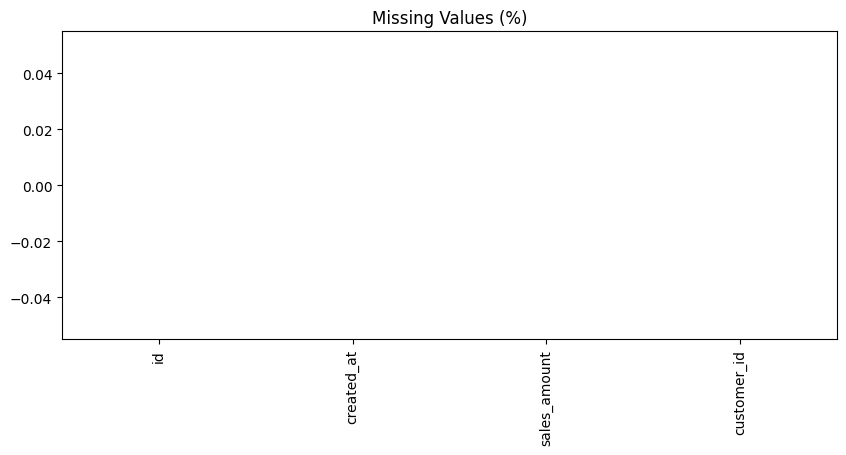

In [11]:
# Visualize missing values
plt.figure(figsize=(10, 4))
orders_df.isnull().mean().sort_values(ascending=False).plot.bar()
plt.title("Missing Values (%)")
plt.show()

In [12]:
# Identify Duplcated Records
print(f"\nTotal Duplicates: {orders_df.duplicated().sum()}")
print("\nSample Records (if any):")
print(orders_df[orders_df.duplicated(keep=False)].head())


Total Duplicates: 0

Sample Records (if any):
Empty DataFrame
Columns: [id, created_at, sales_amount, customer_id]
Index: []


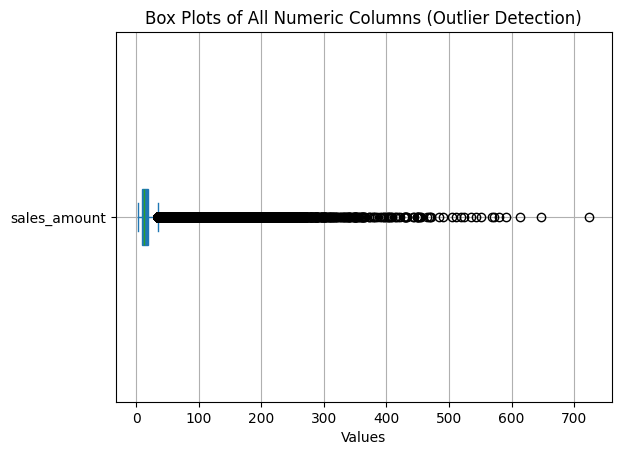

In [13]:
# Identify outliers with boxplots (numerical columns)
orders_df.select_dtypes(include=['int64', 'float64']).plot.box(
    vert=False,
    patch_artist=True,
    grid=True
)
plt.title("Box Plots of All Numeric Columns (Outlier Detection)")
plt.xlabel("Values")
plt.show()

In [14]:
orders_df['sales_amount'].describe().apply(lambda x: f'{x:.2f}')

count    3927651.00
mean          15.50
std           11.83
min            3.02
25%            8.91
50%           11.61
75%           19.04
max          723.90
Name: sales_amount, dtype: object

In [15]:
min_value = orders_df['sales_amount'].min()
max_value = orders_df['sales_amount'].max()
print(f'Min Value:{min_value}')
print(f'Max Value:{max_value}')

Min Value:3.02
Max Value:723.9


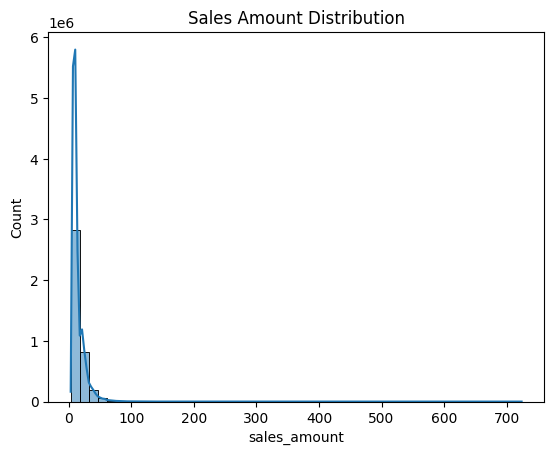

In [16]:
# From here, we can see that the Distribution of sales amount is right skewed indicating that most customers tend to make low to moderate-value purchases, while a smaller number of customers place significantly higher-value orders.
# This pattern is common in retail and e-commerce, where the majority of transactions are relatively small, but a few large purchases disproportionately increase the average.
# From a business perspective, this insight suggests opportunities to increase average order value through strategies like upselling, product bundling, and minimum spend incentives.
# Additionally, the presence of high-value transactions highlights the importance of identifying and retaining high-spending customers, who could be targeted with personalized offers, loyalty programs, or premium services to encourage repeat purchases and long-term engagement.
sns.histplot(orders_df['sales_amount'], kde=True, bins=50)
plt.title('Sales Amount Distribution')
plt.show()


# Data Transformation

In [17]:
transformer = DataTransformer(orders_df)
transformer.format_column_names_to_snake_case()
transformer.trim_spaces()
cleaned_df = transformer.get_transformed_data()

In [18]:
# Extract date from created_at column
cleaned_df['date'] = cleaned_df['created_at'].dt.date

# Extract year, month, day
cleaned_df['year'] = cleaned_df['created_at'].dt.year
cleaned_df['month'] = cleaned_df['created_at'].dt.month
cleaned_df['day'] = cleaned_df['created_at'].dt.day

# Sort Data by date
cleaned_df = cleaned_df.sort_values('date')

In [19]:
cleaned_df.head(5)

,id,created_at,sales_amount,customer_id,date,year,month,day
36931,11767695,2024-01-01 17:45:00,10.9,2282822,2024-01-01,2024,1,1
66515,11759686,2024-01-01 15:10:47,27.7,485748,2024-01-01,2024,1,1
66514,11758121,2024-01-01 14:43:39,27.7,412072,2024-01-01,2024,1,1
66513,11757886,2024-01-01 14:39:14,27.7,758097,2024-01-01,2024,1,1
66512,11756416,2024-01-01 14:13:48,27.7,12766,2024-01-01,2024,1,1


In [20]:
min_date = cleaned_df['created_at'].min()
max_date = cleaned_df['created_at'].max()
print(f'Min Value:{min_date}')
print(f'Max Value:{max_date}')

Min Value:2024-01-01 06:10:16
Max Value:2024-12-31 23:51:17


## Calculate Total and Average Sales

In [21]:
# Total and average sales
total_sales = cleaned_df['sales_amount'].sum()
average_sales = cleaned_df['sales_amount'].mean()

print(f"Total Sales: {total_sales}")
print(f"Average Sales: {average_sales}")

Total Sales: 60861017.489999965
Average Sales: 15.495525821922561


In [22]:
sales_by_date = cleaned_df.groupby('date')['sales_amount'].sum()
print(sales_by_date)

date
2024-01-01    134397.45
2024-01-02    103768.38
2024-01-03     92528.13
2024-01-04     93680.20
2024-01-05    111999.74
                ...    
2024-12-27    218372.67
2024-12-28    229776.00
2024-12-29    212202.17
2024-12-30    190107.24
2024-12-31    245000.74
Name: sales_amount, Length: 366, dtype: float64


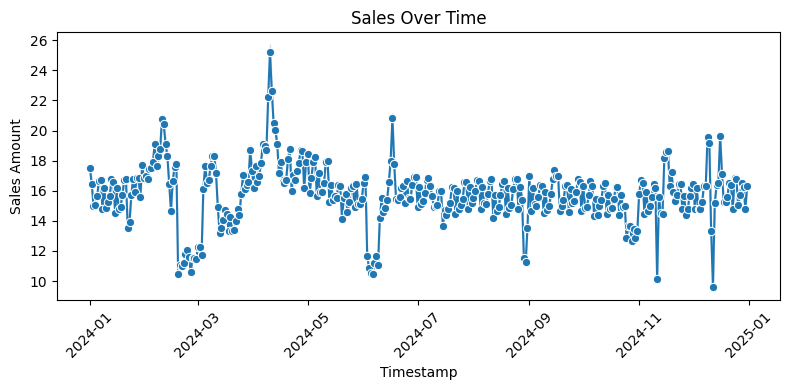

In [23]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=cleaned_df, x='date', y='sales_amount', marker='o')
plt.title("Sales Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Order by desc for sales per cutomer
sales_per_customer = cleaned_df.groupby('customer_id')['sales_amount'].sum().reset_index()
print(sales_per_customer.sort_values(by='sales_amount', ascending=False))

       customer_id  sales_amount
245381     2367218      11394.85
206826     2147009       9587.23
515136      421582       8998.07
301015     2689865       8788.46
700557      829319       7992.10
...            ...           ...
131965     1723205          3.20
35703       119939          3.20
685949      749602          3.20
21887      1121777          3.15
648199      570318          3.11

[730485 rows x 2 columns]


## View sales amount by customer id

In [25]:
# Sort and get top 10
top_customers = sales_per_customer.sort_values(by='sales_amount', ascending=False).head(10)

print(top_customers)

       customer_id  sales_amount
245381     2367218      11394.85
206826     2147009       9587.23
515136      421582       8998.07
301015     2689865       8788.46
700557      829319       7992.10
49108      1268724       6954.91
616088      530199       6227.43
323289     2809874       5915.31
142733     1788215       5896.19
245459     2367639       5832.71


C:\Users\eweli\AppData\Local\Temp\ipykernel_18736\3003772288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='customer_id', y='sales_amount', palette='Blues_d')


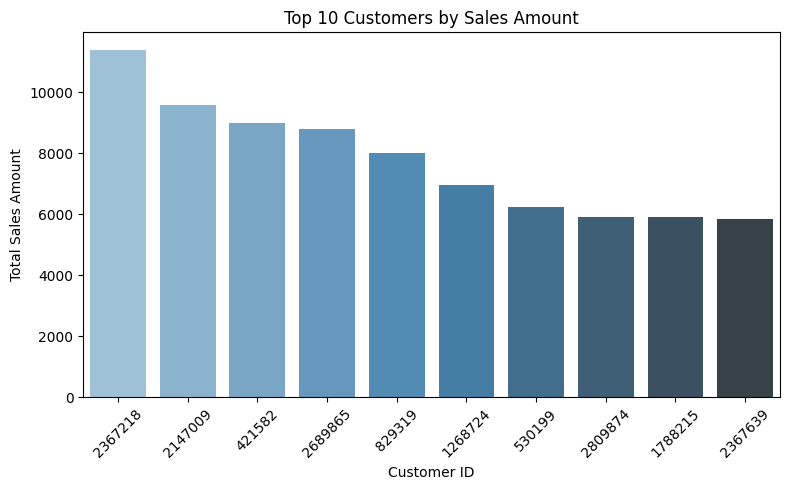

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_customers, x='customer_id', y='sales_amount', palette='Blues_d')

plt.title('Top 10 Customers by Sales Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Check how many records with sales_amount '0', which may result to Monetary value equal zero

In [27]:
cleaned_df[cleaned_df['sales_amount']==0].describe()

,created_at,sales_amount,year,month,day
count,0,0.0,0.0,0.0,0.0
mean,NaT,NaN,NaN,NaN,NaN
min,NaT,NaN,NaN,NaN,NaN
25%,NaT,NaN,NaN,NaN,NaN
50%,NaT,NaN,NaN,NaN,NaN
75%,NaT,NaN,NaN,NaN,NaN
max,NaT,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN


# RFM Feature Engineering

In [28]:
# Reference date: max date + 1 day
ref_date = cleaned_df['created_at'].max() + pd.Timedelta(days=1)

In [29]:
# RFM Calculation
rfm = cleaned_df.groupby('customer_id').agg({
    'created_at': lambda created_at: (ref_date - created_at.max()).days,  # Recency
    'id': lambda InvoiceNo: InvoiceNo.nunique(), # Frequency
    'sales_amount':lambda sales_amount: sales_amount.sum()  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
print(rfm.head())

  customer_id  recency  frequency  monetary
0     1000015       18          4    158.11
1      100002       46         20    334.03
2     1000020       68          6     52.10
3     1000029        4         55    838.79
4     1000035       16          8    125.11


In [30]:
# View data type
rfm.dtypes

customer_id     object
recency          int64
frequency        int64
monetary       float64
dtype: object

## Identify outliers with boxplots

From the boxplots, we can see that there are outliers in monetary which might cause accurate predictions




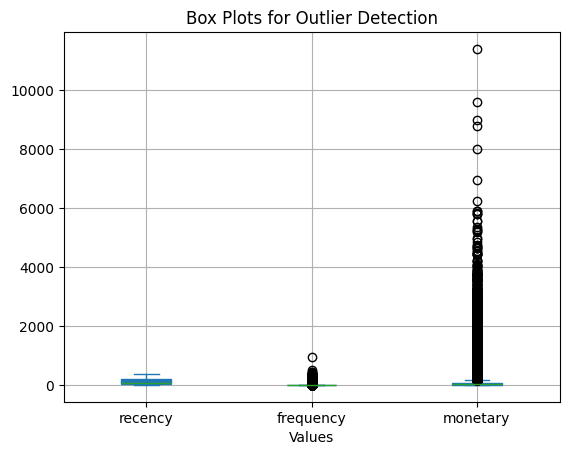

In [31]:
# Identify outliers with boxplots
rfm.select_dtypes(include=['int64', 'float64']).plot.box(
    patch_artist=True,
    grid=True
)
plt.title("Box Plots for Outlier Detection")
plt.xlabel("Values")
plt.show()

## Exploratory Analysis of RFM Features

In [32]:
rfm.describe()

,recency,frequency,monetary
count,730485.000000,730485.000000,730485.000000
mean,120.590631,5.376772,83.315903
std,109.045257,11.573600,168.329153
min,1.000000,1.000000,3.110000
25%,21.000000,1.000000,15.260000
50%,81.000000,2.000000,32.320000
75%,208.000000,5.000000,81.310000
max,366.000000,946.000000,11394.850000


## Distributions of 'recency', 'frequency', 'monetary' columns




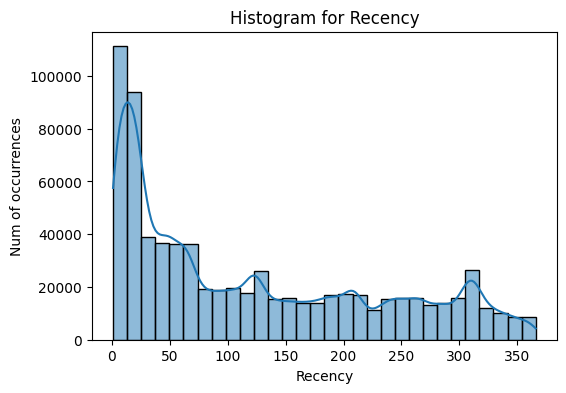

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm, x='recency', bins=30, kde=True)
plt.title('Histogram for Recency')
plt.xlabel('Recency')
plt.ylabel('Num of occurrences')
plt.show()

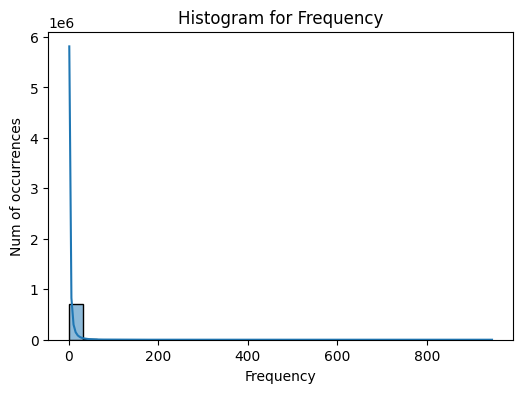

In [34]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm, x='frequency', bins=30, kde=True)
plt.title('Histogram for Frequency')
plt.xlabel('Frequency')
plt.ylabel('Num of occurrences')
plt.show()

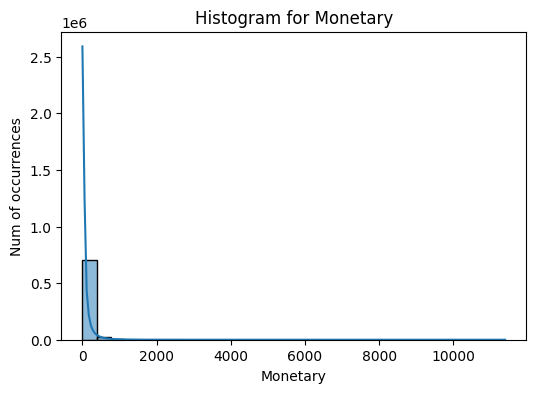

In [35]:
plt.figure(figsize=(6, 4))
sns.histplot(data=rfm, x='monetary', bins=30, kde=True)
plt.title('Histogram for Monetary')
plt.xlabel('Monetary')
plt.ylabel('Num of occurrences')
plt.show()

## Correlation
From the correlation matrix, it shows that there is a strong positive correlation (0.92) between frequency and monetary value, indicating that customers who purchase more often also tend to spend more, making them highly valuable.

Additionally, recency shows a moderate negative correlation with both frequency (-0.28) and monetary value (-0.29). This suggests that customers who have made recent purchases are more likely to be frequent buyers and higher spenders. Such patterns are common in customer behavior analysis, reinforcing that recent engagement is a strong indicator of customer value.

In short

- Increasing purchase frequency leads to higher customer spending
- Encouraging recent purchases (reducing recency) is associated with higher frequency and monetary value

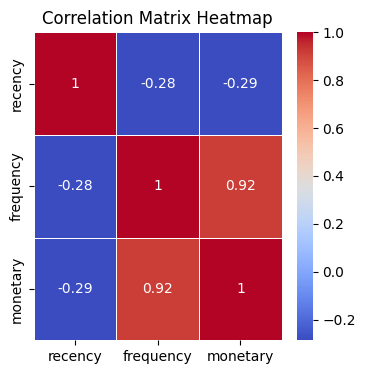

In [36]:
corr_matrix = rfm[[ 'recency', 'frequency', 'monetary']].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Standardising Data
Implemented StandardScaler to normalize features (mean=0, std=1) to ensure equal weighting in distance calculations.

In [37]:
scaler = StandardScaler()
rfm = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

In [38]:
rfm_normalized = pd.DataFrame(rfm, columns=['recency', 'frequency', 'monetary'])
rfm_normalized.head()

,recency,frequency,monetary
0,-0.940808,-0.118958,0.444333
1,-0.684034,1.263500,1.489429
2,-0.482283,0.053849,-0.185446
3,-1.069196,4.287626,4.488079
4,-0.959149,0.226656,0.248288


### Visualise data after standardisation

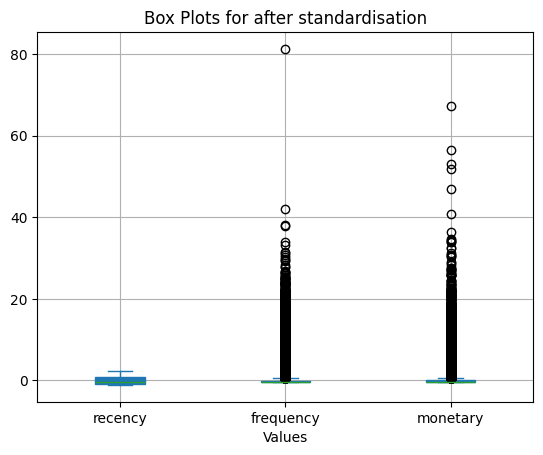

In [39]:
rfm_normalized.select_dtypes(include=['int64', 'float64']).plot.box(
    patch_artist=True,
    grid=True
)
plt.title("Box Plots for after standardisation")
plt.xlabel("Values")
plt.show()

## Elbow Method

Used to determine the optimal number of clusters (K) for K-means clustering algorithm

From the graph below, 4 or 5 clusters might be a optimal number of clusters

In [40]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(rfm_normalized)
    inertia.append(kmeans.inertia_)


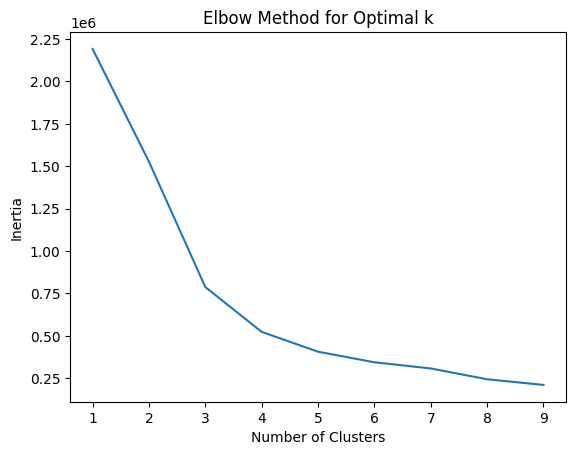

In [41]:
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.title('Elbow Method for Optimal k')
plt.show()

## Silhouette Score
The silhouette score is a metric used to evaluate the effectiveness of clustering. It measures how well each data point fits within its assigned cluster compared to other clusters. A higher silhouette score indicates that the clusters are well-defined and clearly separated, while a lower score suggests overlapping clusters.

In [42]:
silhouette_scores = []

# Silhouette Score requires at least 2 clusters
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_normalized)
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}")

# Find the best k (highest Silhouette Score)
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)

print("\nBest number of clusters (k):", best_k)
print("Highest Silhouette Score:", f"{best_score:.4f}")

k=2: Silhouette Score = 0.4748
k=3: Silhouette Score = 0.5426
k=4: Silhouette Score = 0.5684
k=5: Silhouette Score = 0.5576
k=6: Silhouette Score = 0.5215
k=7: Silhouette Score = 0.4784
k=8: Silhouette Score = 0.4485
k=9: Silhouette Score = 0.4529
k=10: Silhouette Score = 0.4502

Best number of clusters (k): 4
Highest Silhouette Score: 0.5684


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_normalized['cluster'] = kmeans.fit_predict(rfm_normalized)

In [ ]:
rfm_normalized.head()

,recency,frequency,monetary,cluster
0,-0.940808,-0.118958,0.444333,0
1,-0.684034,1.263500,1.489429,3
2,-0.482283,0.053849,-0.185446,0
3,-1.069196,4.287626,4.488079,3
4,-0.959149,0.226656,0.248288,0


In [ ]:
rfm_normalized.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'cluster':'count',
}).round(2)
     

,recency,frequency,monetary,cluster
cluster,,,,
0,-0.61,-0.13,-0.13,425218
1,1.23,-0.31,-0.32,251952
2,-1.03,8.38,8.00,4849
3,-0.91,1.89,1.99,48466


<Axes: xlabel='cluster', ylabel='recency'>

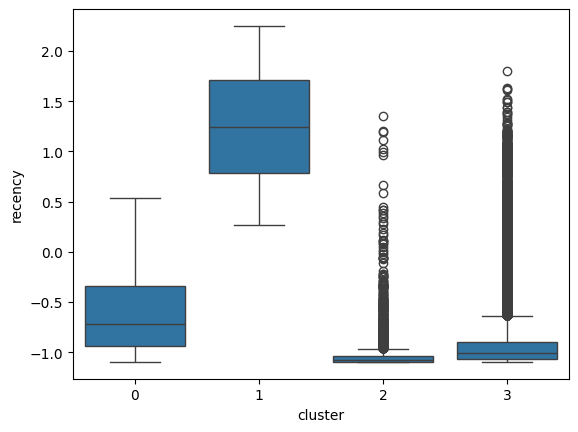

In [ ]:
sns.boxplot(x='cluster', y = 'recency', data = rfm_normalized)

<Axes: xlabel='cluster', ylabel='frequency'>

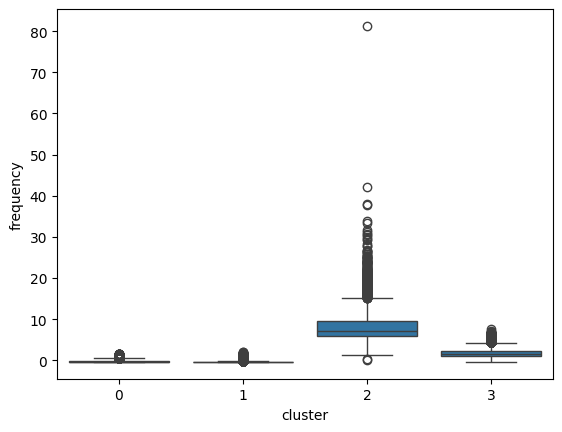

In [ ]:
sns.boxplot(x='cluster', y = 'frequency', data = rfm_normalized)

<Axes: xlabel='cluster', ylabel='monetary'>

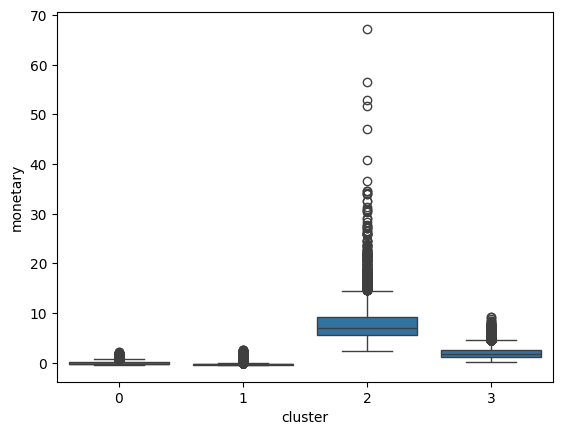

In [ ]:
sns.boxplot(x='cluster', y = 'monetary', data = rfm_normalized)

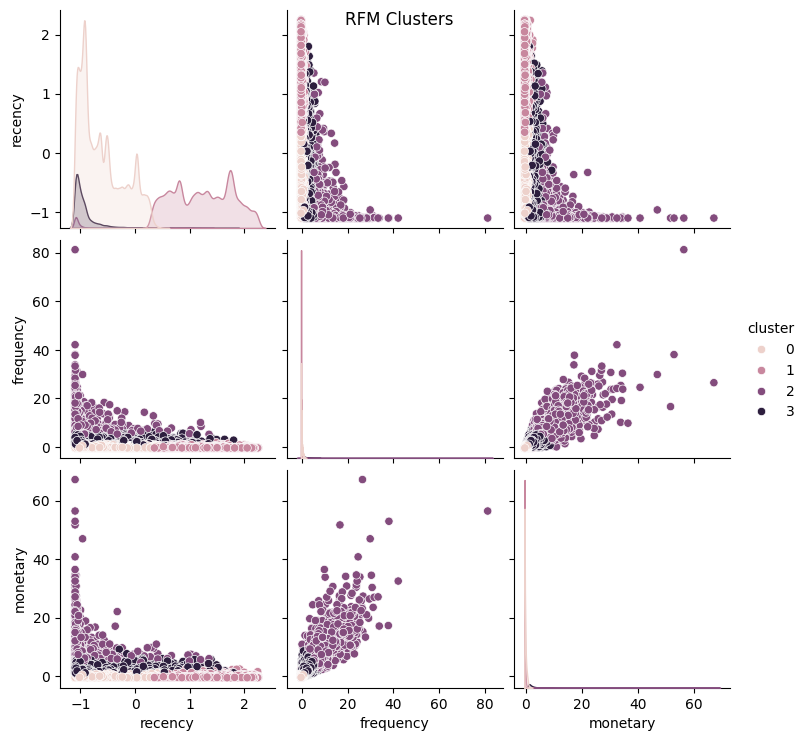

In [ ]:
sns.pairplot(rfm_normalized, hue='cluster', vars=['recency', 'frequency', 'monetary'])
plt.suptitle('RFM Clusters')
plt.show()

In [ ]:
rfm_normalized.groupby('cluster').agg({
    'recency': ['mean', 'median'],
    'frequency': ['mean', 'median'],
    'monetary': ['mean', 'median'],
    'cluster':'count',
}).round(2)

recency        frequency        monetary        cluster
           mean median      mean median     mean median   count
cluster                                                        
0         -0.61  -0.72     -0.13  -0.29    -0.13  -0.26  425218
1          1.23   1.24     -0.31  -0.38    -0.32  -0.38  251952
2         -1.03  -1.08      8.38   7.23     8.00   6.94    4849
3         -0.91  -1.01      1.89   1.61     1.99   1.69   48466

### **Determine number of clusters**
The optimal number of clusters (k=4) was determined via the elbow method, supported by silhouette analysis. K-means clustering revealed distinct groups: Low-Engagement Customers, Recent but Low-Spending Customers, Loyal Customers, and Mid-Tier Regulars. 
### **Cluster Summary & Strategies**

| Cluster | Label                     | Recency (R)       | Frequency (F)     | Monetary (M)      | Size     |
|---------|---------------------------|-------------------|-------------------|-------------------|----------|
| 0       | Low Engagement Customers  | Below avg         | Slightly below avg| Slightly below avg| 425,218  |
| 1       | Recent but Low Spending Customers     | Above avg         | Below avg         | Below avg         | 251,952  |
| 2       | Loyal Customers      | Well below avg    | Extremely high    | Extremely high    | 4,849    |
| 3       | Mid Tier Regulars         | Below avg         | Above avg         | Above avg         | 48,466   |

### **Interpretation**

### **Cluster 0: Low Engagement Customers**

This cluster has the largest number of customers which covers 425218 customers. However, the data indicates that these customers are infrequent shoppers with low spending, suggesting they may be inactive or one-time buyers. In order to retain them, businesses should consider implementing targeted strategies such as reactivation campaigns which offers personalized discounts, reminders, or exclusive vouchers to encourage repeat purchases. Additionally, low-cost engagement efforts, such as regular email updates or newsletters, can help maintain interest. Customer feedback surveys also provide valuable insights into their shopping experience.

### **Cluster 1: Recent but Low Spending Customers**

This cluster has the second largest number of customer which covers 251952 customers. These customers have made recent purchases but do not buy often or spend much. This indicates they could be new or occasional buyers.To strengthen their engagement, business can introduce loyalty programs to ecourage repeat purchases with rewards. Additionally, personalized product recommendations based on their purchase history and browsing behavior could enhance their shopping experience and encourage more frequent transactions.

### **Cluster 2: Loyal Customers**

This segment of customers can be considered loyal because they are recent, frequent, and high spenders. They spent significantly more than average and purchased frequently but haven’t returned recently. These are top-tier customers, however this group only includes 4849 customers. To retain them or attract more customers, businesses can offer special promotions like early access to products and complimentary shipping. Personalized communication such as personalized thank-you notes, tailored offers, and member-exclusive events and promotions can also be provided to remain their interest. To enhance their shopping experience, services like concierge assistance can be used to engage them. By doing so, this can make them feel valued and address issues before they churn again.

### **Cluster 3: Mid Tier Regulars**

This segment represents regular customers who purchase moderately often and spend moderately with 48466 customers. These are customers are consistent and valuable but at risk of churning if not re-engaged. In order to strengthen their loyalty and encourage repeat purchases, businesses can introduce membership perks, bulk purchase discounts, and limited-time promotions like flash sales. Seasonal campaigns tied to events like 5.5 or 6.6 sales, along with targeted outreach during peak shopping periods, can also help in their engagement. By implementing these strategies, business can reduce churn and turn these customers into long-term loyal customers.